In [63]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [64]:
df =pd.read_csv("placement (1).csv")

In [65]:
df.head(1)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1


C:\Users\Engineer\AppData\Local\Temp\ipykernel_13564\2046198373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Engineer\AppData\Local\Temp\ipykernel_13564\2046198373.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


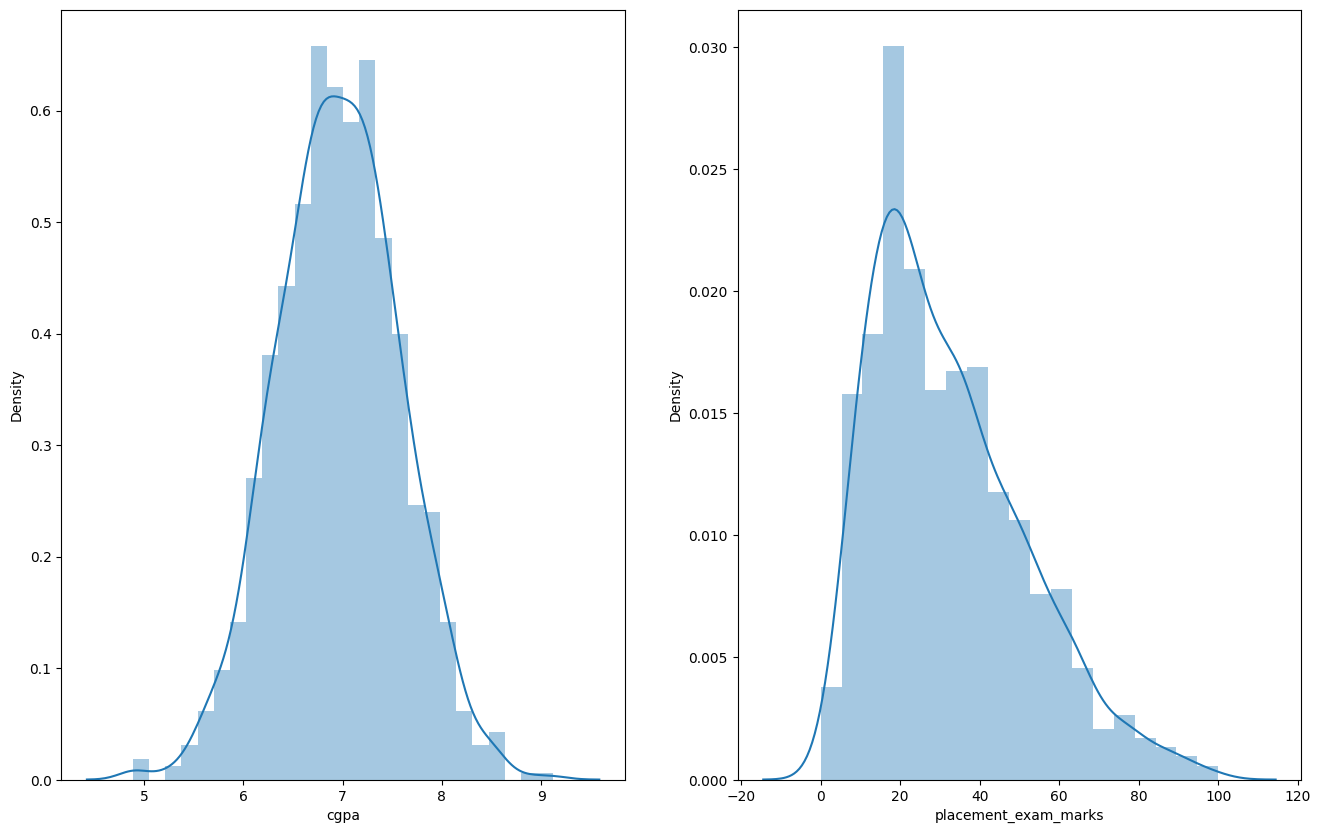

In [66]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)

sns.distplot(df['placement_exam_marks'])
plt.show()

In [67]:
df['cgpa'].skew()

-0.014529938929314918

In [68]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [69]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [70]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

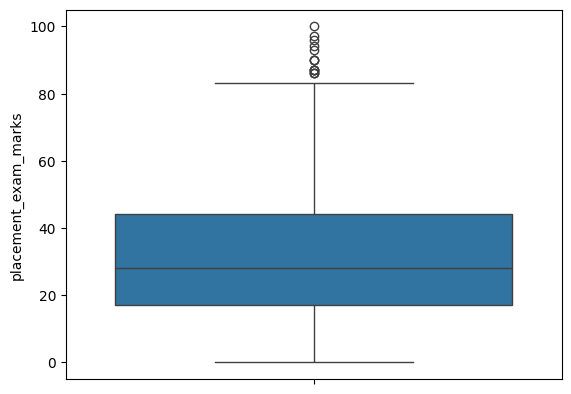

In [71]:
sns.boxplot(df['placement_exam_marks'])

In [72]:
# Finding the IQR 
precentile25 =df['placement_exam_marks'].quantile(0.25)
precentile75 =df['placement_exam_marks'].quantile(0.75)

In [73]:
precentile25

17.0

In [74]:
precentile75

44.0

In [75]:
iqr = precentile75 - precentile25

In [76]:
iqr

27.0

In [77]:
upper_limit = precentile75 + 1.5 * iqr
lower_limit =  precentile25 - 1.5 * iqr

In [78]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


# Finding Outliers

In [80]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [81]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [82]:
new_df =df[df['placement_exam_marks'] < upper_limit]

In [83]:
new_df.shape

(985, 3)

C:\Users\Engineer\AppData\Local\Temp\ipykernel_13564\1309156508.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Engineer\AppData\Local\Temp\ipykernel_13564\1309156508.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


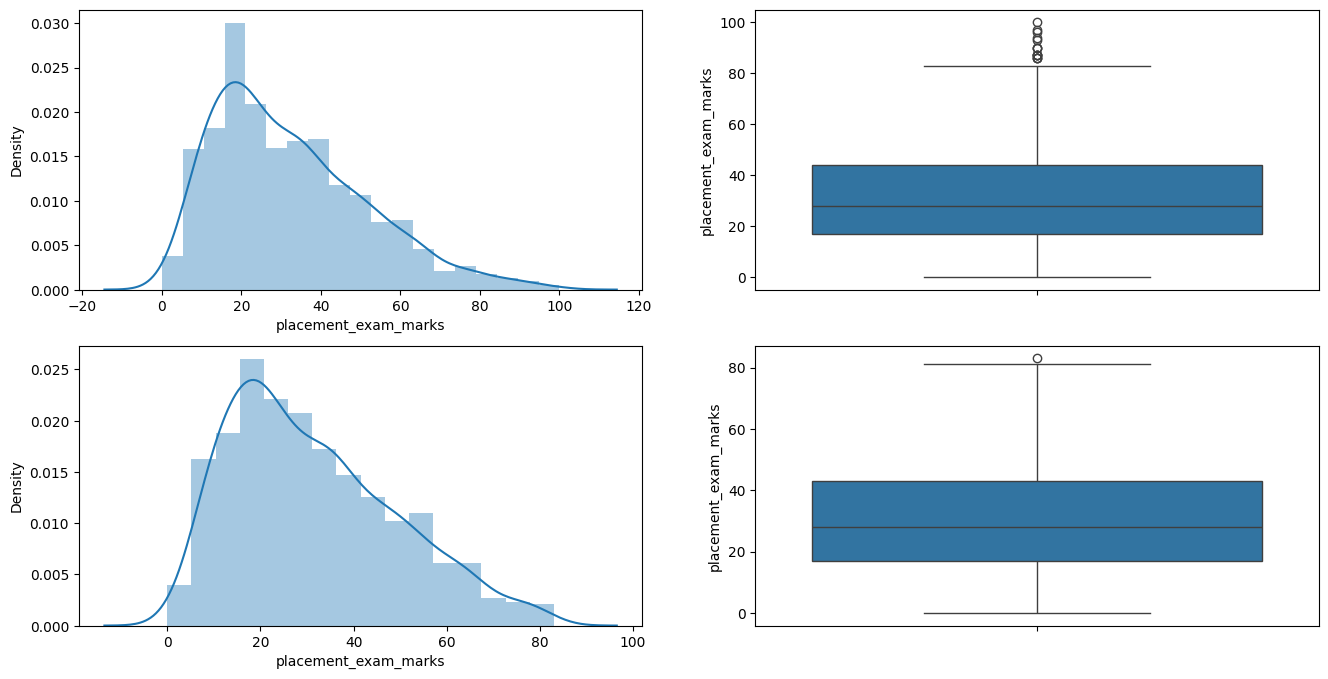

In [85]:
# Comparing 

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

# Capping 

In [86]:
new_df_cap =df.copy()

new_df_cap['placement_exam_marks'] =np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [87]:
new_df_cap.shape

(1000, 3)

C:\Users\Engineer\AppData\Local\Temp\ipykernel_13564\1476363708.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Engineer\AppData\Local\Temp\ipykernel_13564\1476363708.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


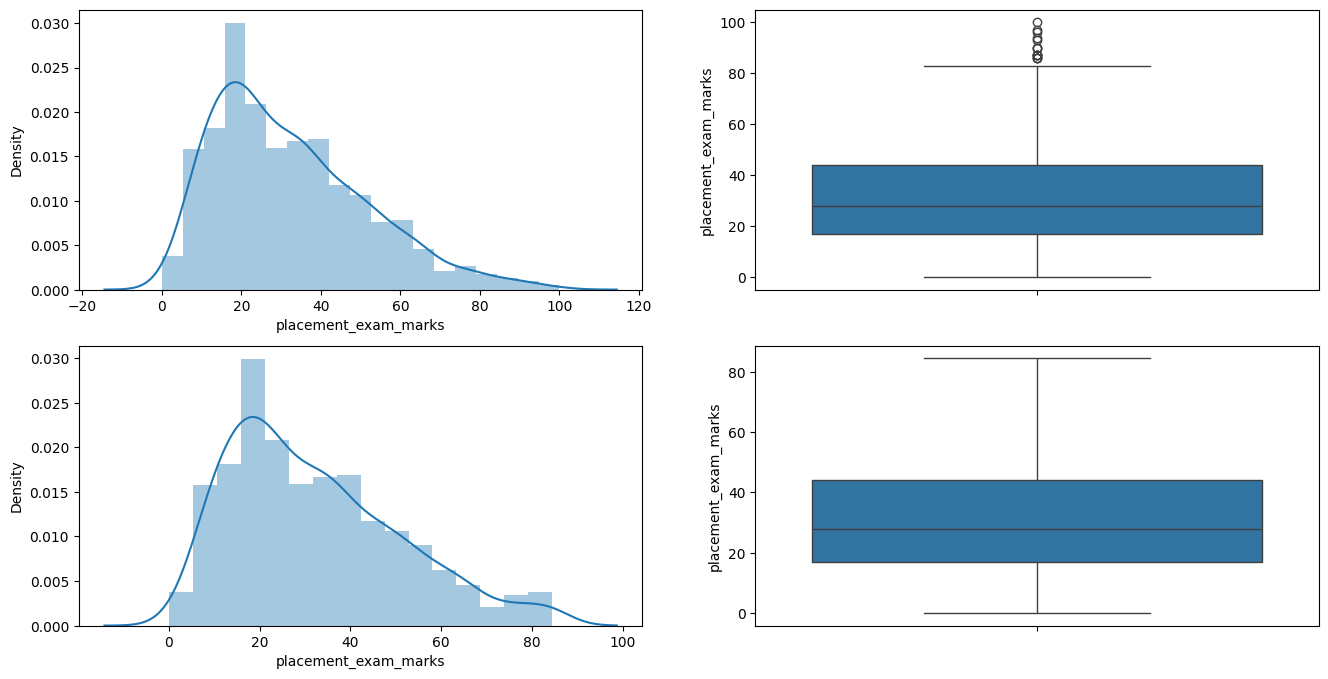

In [88]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()
